# Open Source Software Development: Final Project Trace Data Analysis
## Daisy Pinaroc

# Commits file

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in commits.csv data, has over 4.5 million rows
commits_df = pd.read_csv('commits.csv')
commits_df = commits_df.drop_duplicates()

# Dropping any incomplete columns (columns with nan values)
commits_df = commits_df.dropna()

commits_df = commits_df.drop(columns=['Unnamed: 0'])

commits_df.head()

,repo_id,repo_name,data_collection_date,event_type,event_datetime,contributor_name
0,25939,ompi,2023-02-28 16:46:00,commit,2018-04-27 05:30:01-05:00,Themos Tsikas
1,25918,sage,2023-02-28 16:46:00,commit,2008-03-26 06:11:39-05:00,mabshoff
2,26069,Trilinos,2023-02-28 16:46:00,commit,2005-07-23 00:15:42-05:00,Marzio Sala
3,26069,Trilinos,2023-02-28 16:46:00,commit,2005-07-23 00:15:42-05:00,Marzio Sala
4,25939,ompi,2023-02-28 16:46:00,commit,2018-04-27 05:30:01-05:00,Themos Tsikas


In [3]:
commits_df = commits_df.drop(columns=['repo_name','data_collection_date','event_type'])

In [4]:
commits_df['event_datetime'] = pd.to_datetime(commits_df['event_datetime'], format='%Y-%m-%d %H:%M:%S%z',utc=True)

In [5]:
commits_df['event_datetime'] = commits_df['event_datetime'].dt.tz_localize(None)

## Getting the projects with most amount of commits

In [6]:
commit_counts = commits_df['repo_id'].value_counts()

print('Projects with most amount of commits',commit_counts,sep='\n')

# Top repo_id: 25859

top_commit_project_df = commits_df.loc[commits_df['repo_id'] == 25859]
top_commit_project_df = top_commit_project_df[['repo_id','event_datetime','contributor_name']]

# Extract the first and last dates from the date column
first_date = top_commit_project_df['event_datetime'].min()
last_date = top_commit_project_df['event_datetime'].max()

# Print the results
print('First date:', first_date)
print('Last date:', last_date)

Projects with most amount of commits
25859    1261533
26069     732752
26045     283881
25918     247368
25939     211557
          ...   
25860          5
26083          4
25836          3
26052          3
25903          1
Name: repo_id, Length: 280, dtype: int64
First date: 2001-06-06 20:29:01
Last date: 2019-09-01 15:08:33


## Getting number of commits created for each year in top project

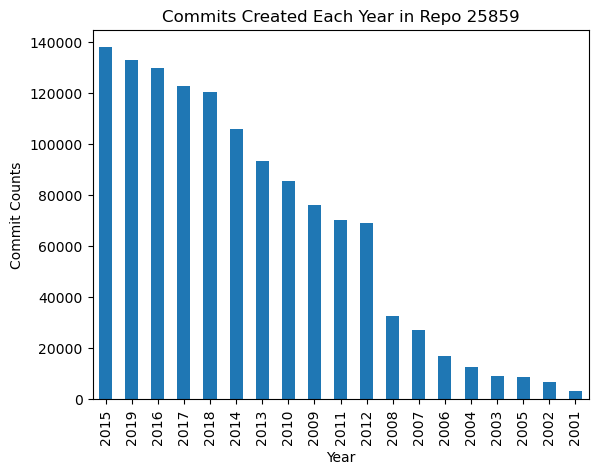

Top Years
-----------
2015    138038
2019    132941
2016    129991
2017    122836
2018    120311
Name: event_datetime, dtype: int64


In [7]:
# For the project with the most amount of commits, which year did most get created?
year_counts = top_commit_project_df['event_datetime'].dt.year.value_counts()
year_counts.plot(kind='bar') 

plt.title('Commits Created Each Year in Repo 25859')
plt.xlabel('Year')
plt.ylabel('Commit Counts') # Amount of commits created in that month

# plt.tight_layout()
plt.show()

print('Top Years','-----------',sep='\n')
print((year_counts.head(5)))

## Getting top contributor for the project

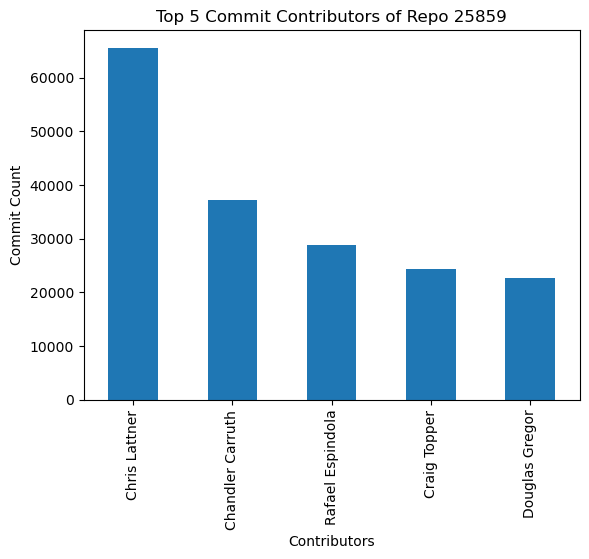

Top Commit Contributors of Project Repo 25859
----------------------------------------
Chris Lattner       65577
Chandler Carruth    37291
Rafael Espindola    28829
Craig Topper        24439
Douglas Gregor      22712
Name: contributor_name, dtype: int64

Number of contributors:  1304


In [8]:
# Getting top contributor for commits created
contributor_counts = top_commit_project_df['contributor_name'].value_counts()
top_5_contributors = contributor_counts.head(5)

top_5_contributors.plot(kind='bar')

plt.title('Top 5 Commit Contributors of Repo 25859')
plt.xlabel('Contributors')
plt.ylabel('Commit Count')

# plt.tight_layout()
plt.show()


print('Top Commit Contributors of Project Repo 25859','----------------------------------------',sep='\n')
print(top_5_contributors)

print()
print('Number of contributors: ',len(contributor_counts.index))

# Issues file

In [9]:
# Reading in issues.csv data
issues_df = pd.read_csv('issues.csv')
issues_df = issues_df.drop_duplicates()

# Dropping any incomplete columns (columns with nan values)
issues_df = issues_df.dropna()

issues_df = issues_df.drop(columns=['Unnamed: 0'])

issues_df.head()

,repo_id,repo_name,data_collection_date,event_type,event_datetime,contributor_name
0,25903,conda-recipes-BiG-CZ,2023-02-28 16:46:00,issue_created,2016-04-07 16:24:49,ocefpaf
1,25989,Block,2023-02-28 16:46:00,issue_created,2021-07-20 12:25:32,peggjt
2,25956,tethysapp-hydroshare_gis,2023-02-28 16:46:00,issue_created,2016-09-01 20:38:14,astraiophos
3,26003,SCI-Solver_FEM,2023-02-28 16:46:00,issue_created,2020-12-18 07:48:22,brainwatcher
4,25918,sage,2023-02-28 16:46:00,issue_created,2022-11-30 11:04:35,dimpase


In [10]:
issues_df = issues_df.drop(columns=['repo_name','data_collection_date','event_type'])

In [11]:
issues_df['event_datetime'] = pd.to_datetime(issues_df['event_datetime'])

## Top Project 

In [12]:
# Getting the projects with most amount of issues created
repo_counts = issues_df['repo_id'].value_counts()
print('Projects with most amount of issues created',repo_counts,sep='\n')

# Top repo_id: 25918

top_issue_project_df = issues_df.loc[issues_df['repo_id'] == 25918]
top_issue_project_df = top_issue_project_df[['repo_id','event_datetime','contributor_name']]

# Extract the first and last dates from the date column
first_date = top_issue_project_df['event_datetime'].min()
last_date = top_issue_project_df['event_datetime'].max()

# Print the results
print('First date:', first_date)
print('Last date:', last_date)

Projects with most amount of issues created
25918    34832
26069     4838
25939     3144
26045     2852
25892     2830
         ...  
26039        1
25972        1
25949        1
25905        1
25931        1
Name: repo_id, Length: 167, dtype: int64
First date: 2006-09-11 03:58:42
Last date: 2023-03-27 21:50:59


## Checking top contribution months for a specific year: 2007

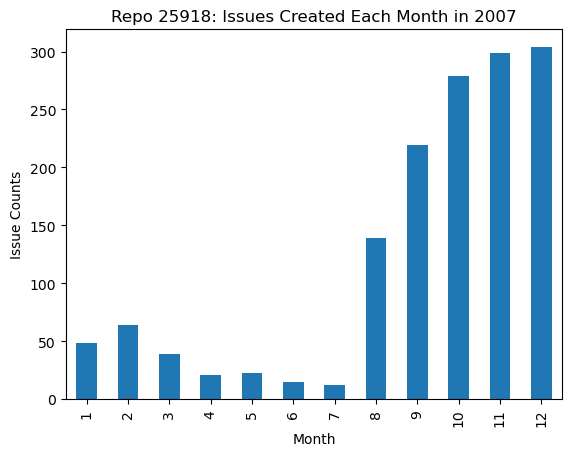

Top Months
-----------
12    304
11    299
10    279
9     219
8     139
Name: 2007, dtype: int64


In [13]:
year = 2007
mask = top_issue_project_df['event_datetime'].dt.year == year
dates = top_issue_project_df.loc[mask, 'event_datetime']

specific_year_df = pd.DataFrame()
specific_year_df['2007'] = dates

month_counts = specific_year_df['2007'].dt.month.value_counts()

specific_year_df['2007'].dt.month.value_counts().sort_index().plot(kind='bar')

plt.title('Repo 25918: Issues Created Each Month in 2007')
plt.xlabel('Month')
plt.ylabel('Issue Counts') # Number of issues created that month

plt.show()

print('Top Months','-----------',sep='\n')
print((month_counts.head(5)))

## Getting top contributor of the project

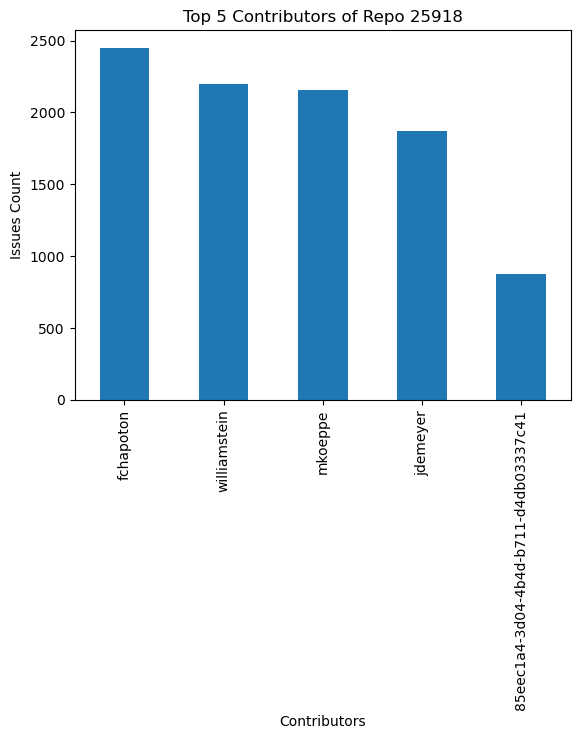

Top Contributors of Project Repo 25918
----------------------------------------
fchapoton                               2451
williamstein                            2200
mkoeppe                                 2160
jdemeyer                                1873
85eec1a4-3d04-4b4d-b711-d4db03337c41     872
Name: contributor_name, dtype: int64


In [14]:
# Getting top contributor for issues created
contributor_counts = top_issue_project_df['contributor_name'].value_counts()
top_5_contributors = contributor_counts.head(5)

top_5_contributors.plot(kind='bar')

plt.title('Top 5 Contributors of Repo 25918')
plt.xlabel('Contributors')
plt.ylabel('Issues Count')

plt.show()

print('Top Contributors of Project Repo 25918','----------------------------------------',sep='\n')
print(top_5_contributors)

# Pull Requests file

In [15]:
# Reading in pull_requests.csv data
pull_requests_df = pd.read_csv('pull_requests.csv')
pull_requests_df = pull_requests_df.drop_duplicates()

# Dropping any incomplete columns (columns with nan values)
pull_requests_df = pull_requests_df.dropna()
pull_requests_df = pull_requests_df.drop(columns=['Unnamed: 0'])

pull_requests_df.head()

,repo_id,repo_name,data_collection_date,event_type,event_datetime,contributor_name,pr_merge_status
0,25952,yt,2023-02-28 16:46:00,pull_request_created,2023-03-27 22:07:35,neutrinoceros,not merged
1,25888,de_rle,2023-02-28 16:46:00,pull_request_created,2020-11-09 22:12:51,dgosselin-p4,merged
2,25880,Gklee,2023-02-28 16:46:00,pull_request_created,2021-03-23 02:09:26,tanmaytirpankar,not merged
3,25952,yt,2023-02-28 16:46:00,pull_request_created,2023-03-27 19:21:09,matthewturk,not merged
4,25939,ompi,2023-02-28 16:46:00,pull_request_created,2021-03-17 00:55:44,rhc54,merged


In [16]:
pull_requests_df = pull_requests_df.drop(columns=['repo_name','data_collection_date','event_type'])

In [17]:
pull_requests_df['event_datetime'] = pd.to_datetime(pull_requests_df['event_datetime'])

## Top project: PRs

In [23]:
# Getting the projects with most amount of PRs created
pr_counts = pull_requests_df['repo_id'].value_counts()
print('Projects with most amount of PRs created',pr_counts.head(),sep='\n')

# Top PR repo_id: 25952

top_pr_project_df = pull_requests_df.loc[pull_requests_df['repo_id'] == 25952]
top_pr_project_df = top_pr_project_df[['repo_id','event_datetime','contributor_name','pr_merge_status']]

Projects with most amount of PRs created
25952    494
25831    312
25840     79
26018     29
26069     14
Name: repo_id, dtype: int64


In [24]:
# Extract the first and last dates from the date column
first_date = top_pr_project_df['event_datetime'].min()
last_date = top_pr_project_df['event_datetime'].max()

# Print the results
print('First date:', first_date)
print('Last date:', last_date)

First date: 2021-11-10 11:19:35
Last date: 2023-03-27 22:07:35


## Getting specific hour of the day when most PRs created: Overall, no specific year

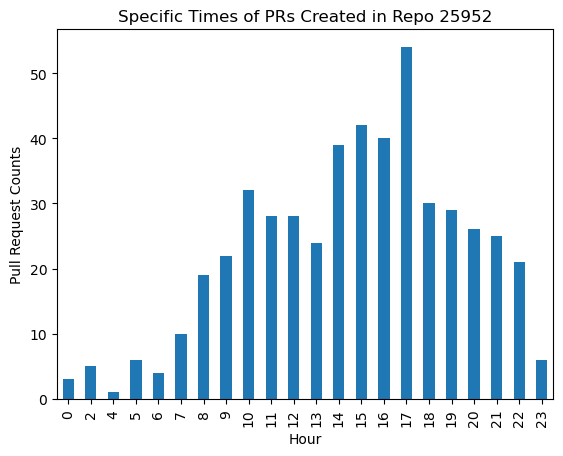

Top Times
-----------
17    54
15    42
16    40
14    39
10    32
Name: event_datetime, dtype: int64


In [19]:
# For the project with the most amount of PRs created, at what time(s) of the day do most pull requests get created?
pr_counts = top_pr_project_df['event_datetime'].dt.hour.value_counts()
pr_counts.sort_index().plot(kind='bar') # Use sort_index()

plt.title('Specific Times of PRs Created in Repo 25952')
plt.xlabel('Hour')
plt.ylabel('Pull Request Counts') # Amount of PRs created at that hour

# plt.tight_layout()
plt.show()

print('Top Times','-----------',sep='\n')
print((pr_counts.head(5)))

## Gathering all the merged PRs for top project

In [25]:
merge_pr_tp_df = top_pr_project_df.loc[top_pr_project_df['pr_merge_status'] == 'merged']
merge_pr_tp_df = merge_pr_tp_df[['repo_id','event_datetime','contributor_name','pr_merge_status']]

## Top contributor with most amount of (merged) PRs to project 

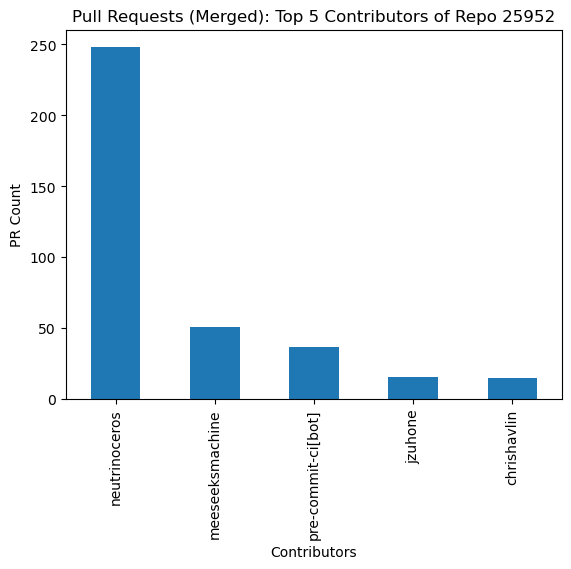

Top Contributors of Project Repo 25952
----------------------------------------
neutrinoceros         248
meeseeksmachine        51
pre-commit-ci[bot]     37
jzuhone                16
chrishavlin            15
Name: contributor_name, dtype: int64




In [34]:
# Getting top contributor for merged PRs 
contributor_counts = merge_pr_tp_df['contributor_name'].value_counts()
top_5_contributors = contributor_counts.head(5)

top_5_contributors.plot(kind='bar')

plt.title('Pull Requests (Merged): Top 5 Contributors of Repo 25952')
plt.xlabel('Contributors')
plt.ylabel('PR Count')

# plt.tight_layout()
plt.show()


print('Top Contributors of Project Repo 25952','----------------------------------------',sep='\n')
print(top_5_contributors, end='\n\n\n')

## Analyzing the percent of merged PRs for top contributors vs.bottom contributors

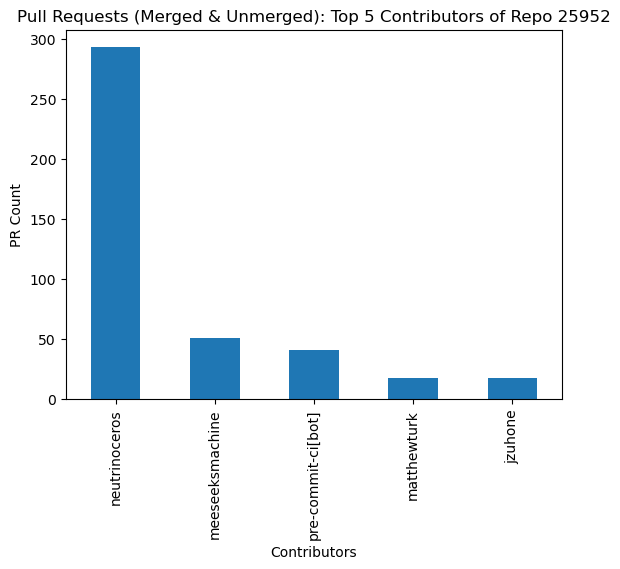

Top Contributors of Project Repo 25952
----------------------------------------
neutrinoceros         293
meeseeksmachine        51
pre-commit-ci[bot]     41
matthewturk            18
jzuhone                18
Name: contributor_name, dtype: int64




In [20]:
# Getting top contributor for all PRs made to the project 
contributor_counts = top_pr_project_df['contributor_name'].value_counts()
top_5_contributors = contributor_counts.head(5)

top_5_contributors.plot(kind='bar')

plt.title('Pull Requests (Merged & Unmerged): Top 5 Contributors of Repo 25952')
plt.xlabel('Contributors')
plt.ylabel('PR Count')

# plt.tight_layout()
plt.show()

print('Top Contributors of Project Repo 25952','----------------------------------------',sep='\n')
print(top_5_contributors, end='\n\n\n')

In [26]:
# For all PRs (merged + unmerged)
# Only considering those who made 3 or more PRs
new_df = top_pr_project_df.copy()

no_contribute_enough = []
for c in new_df['contributor_name']:
    user_count = new_df['contributor_name'].value_counts()[c]  
    if user_count < 3:
        no_contribute_enough.append(c)

no_contribute_enough = list(set(no_contribute_enough))

for i in no_contribute_enough: 
    new_df = new_df.drop(new_df[new_df['contributor_name'].str.contains(i)].index)
    

# Getting lower and top contributors for all PRs made to the project 

contributor_counts = new_df['contributor_name'].value_counts()

contributor_counts = contributor_counts.drop(contributor_counts.index[-1])

print('Top Contributors of Project Repo 25952 (All PRs)','----------------------------------------',sep='\n')
print(contributor_counts.head(5), end='\n\n\n')

print('Contributed Least (but made more than 2 PRs) to Project Repo 25952 (All PRs)','----------------------------------------',sep='\n')
print(contributor_counts.tail())

top_contributors = ['neutrinoceros','meeseeksmachine','pre-commit-ci[bot]','jzuhone','matthewturk']

low_5_contributors = ['Xarthisius','jisuoqing','brittonsmith','chummels','yipihey']

Top Contributors of Project Repo 25952 (All PRs)
----------------------------------------
neutrinoceros         293
meeseeksmachine        51
pre-commit-ci[bot]     41
matthewturk            18
jzuhone                18
Name: contributor_name, dtype: int64


Contributed Least (but made more than 2 PRs) to Project Repo 25952 (All PRs)
----------------------------------------
Xarthisius      9
jisuoqing       4
brittonsmith    4
chummels        3
yipihey         3
Name: contributor_name, dtype: int64


In [27]:
top_merged_prs = []
    
for p in top_contributors:
    # count how many merged requests they have and store it in a variable
    top_user_count = merge_pr_tp_df['contributor_name'].value_counts()[p]
    top_merged_prs.append(top_user_count)
    print(p,':', top_user_count, 'merged PRs')

top_contributors_merged_prs = [248,51,37,16,13]
top_unmerged_prs = []

n= 0
for v in contributor_counts.head(5):
    unmerged_count = v - top_contributors_merged_prs[n]
    top_unmerged_prs.append(unmerged_count)
    n = n + 1

low_merged_prs = []

print()
for p in low_5_contributors:
    # count how many merged requests they have and store it in a variable
    low_user_count = merge_pr_tp_df['contributor_name'].value_counts()[p]
    low_merged_prs.append(low_user_count)
    print(p,':', low_user_count, 'merged PRs')
    
low_unmerged_prs = []
low_contributors_merged_prs = [7,2,3,3,2]

n= 0
for v in contributor_counts.tail(5):
    unmerged_count = v - low_contributors_merged_prs[n]
    low_unmerged_prs.append(unmerged_count)
    n = n + 1

neutrinoceros : 248 merged PRs
meeseeksmachine : 51 merged PRs
pre-commit-ci[bot] : 37 merged PRs
jzuhone : 16 merged PRs
matthewturk : 13 merged PRs

Xarthisius : 7 merged PRs
jisuoqing : 2 merged PRs
brittonsmith : 3 merged PRs
chummels : 3 merged PRs
yipihey : 2 merged PRs


In [28]:
top_total_prs = []

for v in contributor_counts.head(5):
    top_total_prs.append(v)
    
low_total_prs = []

for v in contributor_counts.tail(5):
    low_total_prs.append(v)

    
top_percent_merged = []

for item1,item2 in zip(top_contributors_merged_prs,top_total_prs):
    percent = item1/item2
    top_percent_merged.append(percent)
    
new_percent_merged = []
for v in top_percent_merged:
    n = v * 100
    new_percent_merged.append(round(n))
    
# calcuting avg % merged
avg_top = sum(new_percent_merged)/len(new_percent_merged)


low_percent_merged = []

for item1,item2 in zip(low_merged_prs,low_total_prs):
    percent = item1/item2
    low_percent_merged.append(percent)
    
new_low_percent_merged = []
for v in low_percent_merged:
    n = v * 100
    new_low_percent_merged.append(round(n))
    
avg_low = sum(new_low_percent_merged)/len(new_low_percent_merged)

In [29]:
# make a df that shows top contributors, how many PRs they made and how many were merged & unmerged
top_contributors_df = pd.DataFrame()

top_contributors_df['contributor_name'] = top_contributors
top_contributors_df['total_pr_created'] = top_total_prs
top_contributors_df['amt_merged_pr'] = top_contributors_merged_prs
top_contributors_df['amt_unmerged_pr'] = top_unmerged_prs
top_contributors_df['%_merged'] = new_percent_merged

top_contributors_df.head() 

,contributor_name,total_pr_created,amt_merged_pr,amt_unmerged_pr,%_merged
0,neutrinoceros,293,248,45,85
1,meeseeksmachine,51,51,0,100
2,pre-commit-ci[bot],41,37,4,90
3,jzuhone,18,16,2,89
4,matthewturk,18,13,5,72


In [30]:
# make a df that shows lowest contributors, how many PRs they made and how many were merged & unmerged
low_contributors_df = pd.DataFrame()
low_contributors_df['contributor_name'] = low_5_contributors
low_contributors_df['total_pr_created'] = low_total_prs
low_contributors_df['amt_merged_pr'] = low_merged_prs
low_contributors_df['amt_unmerged_pr'] = low_unmerged_prs
low_contributors_df['%_merged'] = new_low_percent_merged

low_contributors_df.head()

,contributor_name,total_pr_created,amt_merged_pr,amt_unmerged_pr,%_merged
0,Xarthisius,9,7,2,78
1,jisuoqing,4,2,2,50
2,brittonsmith,4,3,1,75
3,chummels,3,3,0,100
4,yipihey,3,2,1,67


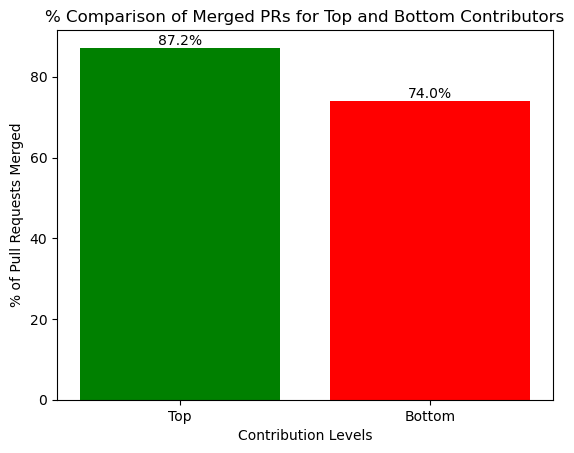

In [31]:
percent_merged = []

for item1,item2 in zip(top_contributors_merged_prs,top_total_prs):
    percent = item1/item2
    percent_merged.append(percent)
    
new_percent_merged = []
for v in percent_merged:
    n = v * 100
    new_percent_merged.append(round(n))
    

# Graph: those with high contributions vs. those with lower contributions
labels = ['Top','Bottom']
avgs = [avg_top,avg_low]

avg_df = pd.DataFrame()
avg_df['contributions_to_project'] = labels
avg_df['%_merged_averages'] = avgs

fig, ax = plt.subplots()
bars = ax.bar(avg_df['contributions_to_project'], avg_df['%_merged_averages'], color=['green', 'red'])

plt.title('% Comparison of Merged PRs for Top and Bottom Contributors')
plt.xlabel('Contribution Levels')
plt.ylabel('% of Pull Requests Merged')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.1f}%'.format(height), ha='center', va='bottom')

plt.show()